<a href="https://colab.research.google.com/github/seo-jeong-bang/like_code/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

In [ ]:
# 데이터 로딩
df = pd.read_csv('results_modified.csv')
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2012-13,2012-08-18T00:00:00Z,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,3,4,2,7,0,12,8,0,0,0,0
1,2012-13,2012-08-18T00:00:00Z,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,4,9,2,6,3,12,11,0,0,0,0
2,2012-13,2012-08-18T00:00:00Z,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,12,4,6,3,5,12,8,2,2,0,0
3,2012-13,2012-08-18T00:00:00Z,QPR,Swansea,0,5,A,0,1,A,L Probert,20,12,11,8,5,3,11,14,2,2,0,0
4,2012-13,2012-08-18T00:00:00Z,Reading,Stoke,1,1,D,0,1,A,K Friend,9,6,3,3,4,3,9,14,2,4,0,1


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2012-13,2012-08-18T00:00:00Z,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,3,4,2,7,0,12,8,0,0,0,0
1,2012-13,2012-08-18T00:00:00Z,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,4,9,2,6,3,12,11,0,0,0,0
2,2012-13,2012-08-18T00:00:00Z,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,12,4,6,3,5,12,8,2,2,0,0
3,2012-13,2012-08-18T00:00:00Z,QPR,Swansea,0,5,A,0,1,A,L Probert,20,12,11,8,5,3,11,14,2,2,0,0
4,2012-13,2012-08-18T00:00:00Z,Reading,Stoke,1,1,D,0,1,A,K Friend,9,6,3,3,4,3,9,14,2,4,0,1


In [ ]:
df['FTR']

0       D
1       H
2       H
3       A
4       D
       ..
3230    D
3231    D
3232    D
3233    A
3234    A
Name: FTR, Length: 3235, dtype: object

In [ ]:
# 레이블 인코딩(Label Encoding)
# 홈팀승리 -> 2, 어웨이팀 승리->1, 무승부->0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['FTR']) # 와꾸 맞추기
labels = encoder.transform(df['FTR']) # 변형
print('인코딩 변환값:',labels)

인코딩 변환값: [1 2 2 ... 1 0 0]


In [ ]:
# 새로운 컬럼(코너킥수 = 홈팀코너킥수 + 어웨이팀코너킥수)
df['SC'] = df['HC'] + df['AC'] # 코너킥수
df['FTG'] = df['FTHG'] + df['FTAG'] # 골수

In [ ]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SC,FTG
0,2012-13,2012-08-18T00:00:00Z,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,3,4,2,7,0,12,8,0,0,0,0,7,0
1,2012-13,2012-08-18T00:00:00Z,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,4,9,2,6,3,12,11,0,0,0,0,9,5
2,2012-13,2012-08-18T00:00:00Z,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,12,4,6,3,5,12,8,2,2,0,0,8,3
3,2012-13,2012-08-18T00:00:00Z,QPR,Swansea,0,5,A,0,1,A,L Probert,20,12,11,8,5,3,11,14,2,2,0,0,8,5
4,2012-13,2012-08-18T00:00:00Z,Reading,Stoke,1,1,D,0,1,A,K Friend,9,6,3,3,4,3,9,14,2,4,0,1,7,2


In [ ]:
# 'FTR'변수를 더미 변수를 변환
FTR_dummy = pd.get_dummies(df.FTR, drop_first=True, prefix='FTR')
X = df[['SC']].join(FTR_dummy) # 코너킥수
Y = df[['FTG']] # 골수

In [ ]:
# 상호작용
X['SC x FTR'] = X['SC']*labels
X.head()

,SC,FTR_D,FTR_H,SC x FTR
0,7,1,0,7
1,9,0,1,18
2,8,0,1,16
3,8,0,0,0
4,7,1,0,7


In [ ]:
# 선형회귀.
lm = LinearRegression()
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
b3 = lm.coef_[0][2]
rsq3 = lm.score(X,Y)
rmse3 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

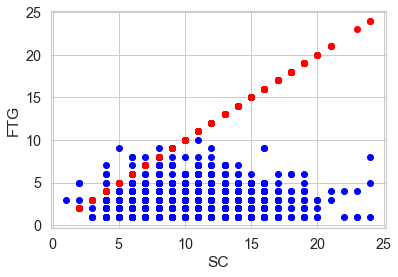

In [ ]:
# 시각화.
# 회귀선을 승부결과로 구별할 수 있다.
df_HOME = df[df.FTR=='H']
df_AWAY = df[df.FTR=='A']
plt.scatter(x=df_HOME.SC, y=df_HOME.FTG, color='blue')
plt.scatter(x=df_AWAY.SC, y=df_AWAY.SC, color='red')
x_grid = np.linspace(10,5,1)
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + (b1+b3)*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('SC') # 유효슈팅
plt.ylabel('FTG') # 골수 
plt.show()